In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import scipy as sp

from matplotlib import pyplot as plt
from theano import tensor as tt

print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.9.3


In [2]:
%config InlineBackend.figure_format = 'retina'
blue, *_ = sns.color_palette()
az.style.use('arviz-darkgrid')
SEED = 5132290 # from random.org
np.random.seed(SEED)

In [59]:
N = 20
K = 1000

alpha = 200.
P0 = sp.stats.norm

In [60]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

x_plot = np.linspace(-3, 3, 200)

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

In [69]:
sample_cdfs

array([[0.        , 0.        , 0.        , ..., 0.98364912, 0.98364912,
        0.98364912],
       [0.        , 0.        , 0.        , ..., 0.97785944, 0.97787504,
        0.97787504],
       [0.        , 0.        , 0.        , ..., 0.97748268, 0.97748268,
        0.97748268],
       ...,
       [0.00461246, 0.00461246, 0.00461246, ..., 0.98510452, 0.98510452,
        0.98510452],
       [0.        , 0.        , 0.        , ..., 0.98094193, 0.98094193,
        0.98094193],
       [0.        , 0.        , 0.        , ..., 0.97379681, 0.97379681,
        0.97379681]])

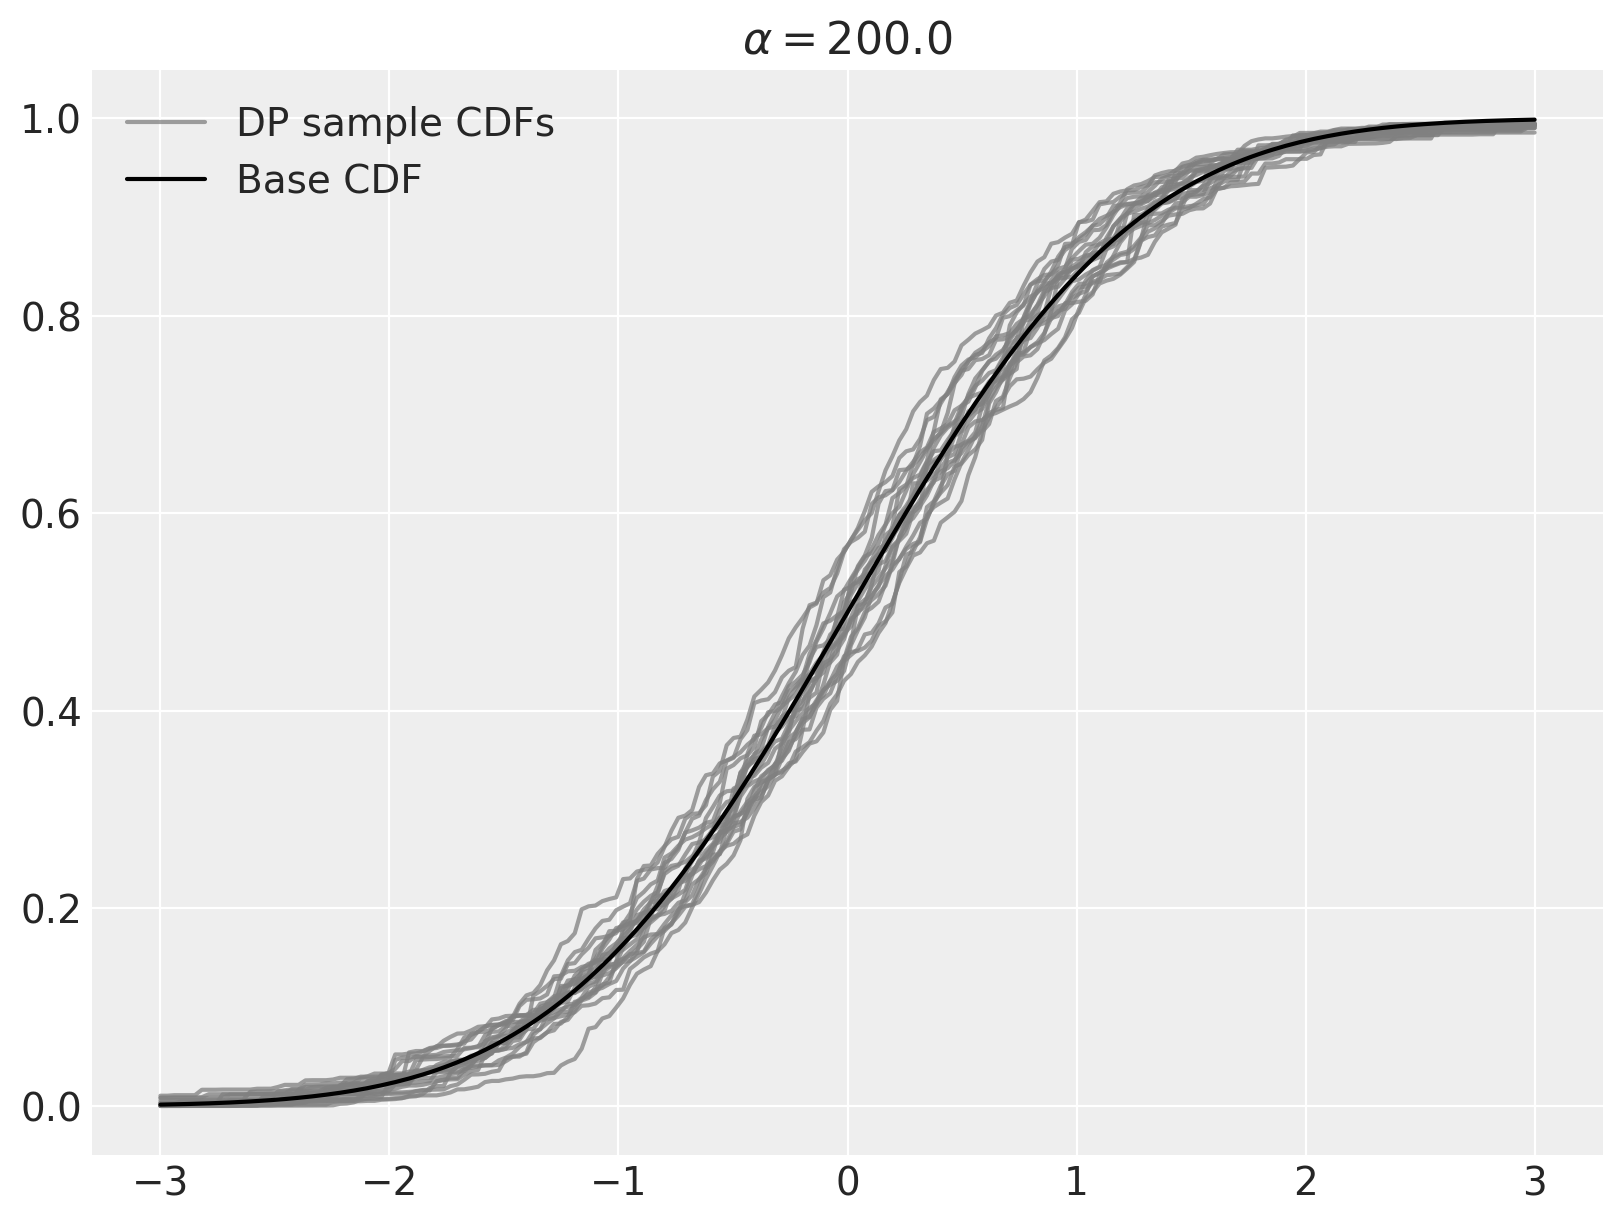

In [61]:
fig, l_ax = plt.subplots(figsize=(8, 6))

# ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
#         label='DP sample CDFs');
# ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
# ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

# ax.set_title(r'$\alpha = {}$'.format(alpha));
# ax.legend(loc=2);

l_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

l_ax.set_title(r'$\alpha = {}$'.format(alpha));
l_ax.legend(loc=2);


In [32]:
sample_cdfs[1:]

array([[0.        , 0.        , 0.        , ..., 0.30487599, 0.30487599,
        0.30487599],
       [0.        , 0.        , 0.        , ..., 0.26483784, 0.26483784,
        0.26483784],
       [0.        , 0.        , 0.        , ..., 0.23201485, 0.23201485,
        0.23201485],
       ...,
       [0.        , 0.        , 0.        , ..., 0.19052351, 0.19052351,
        0.19052351],
       [0.        , 0.        , 0.        , ..., 0.21656258, 0.21656258,
        0.21656258],
       [0.        , 0.        , 0.        , ..., 0.23865913, 0.23865913,
        0.23865913]])

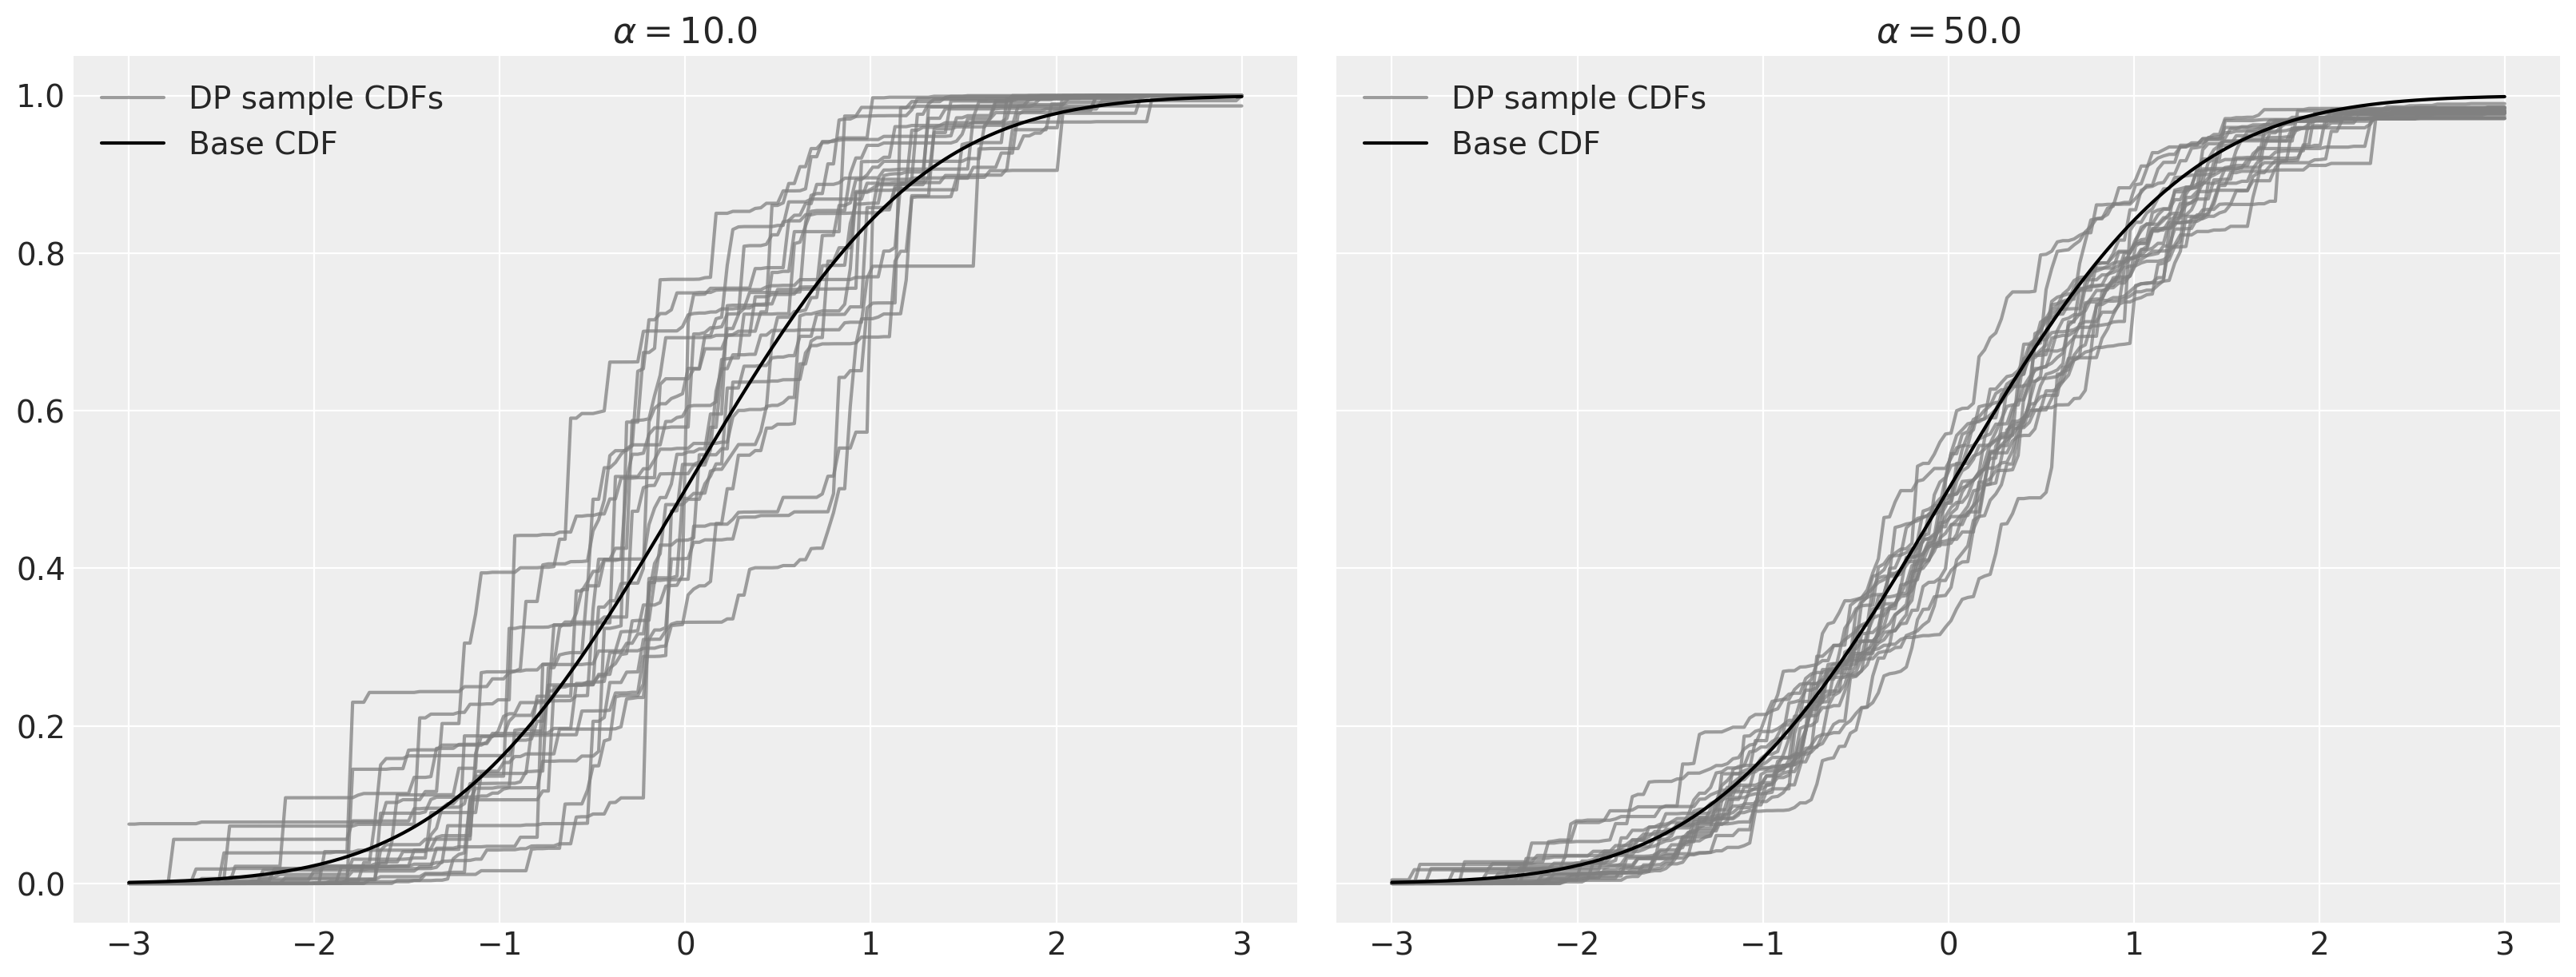

In [62]:
fig, (l_ax, r_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

K = 200
alpha = 10.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

l_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

l_ax.set_title(r'$\alpha = {}$'.format(alpha));
l_ax.legend(loc=2);

K = 200
alpha = 50.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

r_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
r_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
r_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

r_ax.set_title(r'$\alpha = {}$'.format(alpha));
r_ax.legend(loc=2);

In [145]:
def CRP(N, alpha):
    table = []
    for i in range(N):
        if i == 0:
            table.append(1)
        else:
            unique_tables, counts = np.unique(table, return_counts=True)
            probs = np.array(counts / (i + alpha))
            probs = np.append(probs, 1 - probs.sum())
            table.append((np.random.choice(range(len(probs)) , p=probs)+ 1))
             
    print(table)


In [146]:
CRP(20,1)

[1, 2, 1, 2, 1, 3, 3, 3, 3, 2, 4, 3, 3, 5, 3, 1, 3, 3, 1, 3]
